In [1]:
import os 
import shutil
import numpy as np
import scipy as sp
from glob import glob
from matplotlib import pyplot as plt
import pandas as pd

import suite2p as s2p
import TwoPUtils 

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
KOs = {'4467975.1': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},{'date': '28_09_2020', 'scene':'YMaze_LNovel','session':6}), ##########################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':2}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.2': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':3},), ##########################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.3': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), #######################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':2},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.4': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.5':(({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},))}


KOs_baseline = {'4467975.1': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},{'date': '28_09_2020', 'scene':'YMaze_LNovel','session':6}), ##########################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.2': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':3},), ##########################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.3': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), #######################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':2},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.4': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.5':(({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},))}
CTRLs_baseline = {'4467331.1': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '04_12_2020', 'scene':'YMaze_LNovel','session':1},)),
         '4467331.2': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},{'date': '02_12_2020', 'scene':'YMaze_LNovel','session':2}),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '04_12_2020', 'scene':'YMaze_LNovel','session':1},)),
         '4467332.1': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '04_12_2020', 'scene':'YMaze_LNovel','session':1},)),
         '4467332.2': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},{'date': '29_11_2020', 'scene':'YMaze_LNovel','session':2}), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},{'date': '30_11_2020', 'scene':'YMaze_LNovel','session':3}),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '04_12_2020', 'scene':'YMaze_LNovel','session':1},)),
         '4467333.1': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':2},),
                       ({'date': '05_12_2020', 'scene':'YMaze_LNovel','session':1},))} # first YMaze session is 2 files

KOs_reversals = {'4467975.1': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':2}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.2': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.3': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.4': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.5': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1}))}


CTRLs_reversals = {'4467331.1': (({'date': '05_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'05_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '06_12_2020', 'scene':'YMaze_RewardReversal','session':2},),
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'07_12_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467331.2': (({'date': '05_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'05_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '06_12_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'07_12_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467332.1': (({'date': '05_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'05_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '06_12_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'07_12_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467332.2': (({'date': '06_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'06_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '06_12_2020', 'scene':'YMaze_RewardReversal','session':2},),
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'07_12_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467333.1': (({'date': '06_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'06_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '08_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'08_12_2020','scene':'YMaze_LNovel', 'session':1}))}

In [3]:
def get_scan_lengths(file_dict,mouse,write_folder_stem = "/mnt/BigDisk/2P_scratch"):
    file_list = file_dict[mouse]
    max_frame = []
    for f in file_list:
#         print(f)
        try: 
            for _f in f:
#                 print(_f)
        
                scan_str = "%s_%03d_*" % (_f['scene'],_f['session'])
                try:
                    source_folder  = os.path.join('/media','mplitt','Backup Plus3','2P_Data')
                    source_stem = os.path.splitext(glob(os.path.join(source_folder,mouse,_f['date'],_f['scene'],scan_str))[0])[0]
                    info = TwoPUtils.scanner_tools.sbx_utils.loadmat(source_stem+'.mat')
                except:
                    source_folder  = os.path.join('/media','mplitt','Backup Plus4','2P_Data')
                    source_stem = os.path.splitext(glob(os.path.join(source_folder,mouse,_f['date'],_f['scene'],scan_str))[0])[0]
                    info = TwoPUtils.scanner_tools.sbx_utils.loadmat(source_stem+'.mat')
                    
                info_name = os.path.split(source_stem)[-1]
                print(info_name)
                _outdir = os.path.join(write_folder_stem,mouse,"YMazeAll",_f['date'])
                os.makedirs(_outdir,exist_ok=True)
                _source, _output = source_stem+'.mat', os.path.join(_outdir,info_name+'.mat')
                print(_source,_output)
                shutil.copyfile(_source,_output)
#                 !cp {_source} {_output}
                                                      
                max_frame.append(info['max_idx'])
        except:
            scan_str = "%s_%03d_%03d" % (f['scene'],f['session'],f['scan'])
            try:
                source_folder  = os.path.join('/media','mplitt','Backup Plus3','2P_Data')
                source_stem = os.path.splitext(glob(os.path.join(source_folder,mouse,f['date'],f['scene'],scan_str))[0])[0]
                info = TwoPUtils.scanner_tools.sbx_utils.loadmat(source_stem+'.mat')
            except:
                source_folder  = os.path.join('/media','mplitt','Backup Plus4','2P_Data')
                source_stem = os.path.splitext(glob(os.path.join(source_folder,mouse,f['date'],f['scene'],scan_str))[0])[0]
                info = TwoPUtils.scanner_tools.sbx_utils.loadmat(source_stem+'.mat')
                
            info_name = os.path.split(source_stem)[-1]
            print(info_name)
            _outdir = os.path.join(write_folder_stem,mouse,"YMazeAll",f['date'])
            os.makedirs(_outdir,exist_ok=True)
            _source, _output = source_stem+'.mat', os.path.join(_outdir,info_name+'.mat')
            print(_source,_output)
            shutil.copyfile(_source,_output)
            
            max_frame.append(info['max_idx'])
            
        

        
    return np.cumsum([0, *max_frame])

In [4]:
mouse = '4467975.1'
max_frames = get_scan_lengths(KOs,mouse)
print(max_frames)

# load ops
s2p_dir = os.path.join("/mnt/BigDisk/2P_scratch/",mouse,"YMazeAll","suite2p","plane0")
ops = np.load(os.path.join("/mnt/BigDisk/2P_scratch/",mouse,"YMazeAll","suite2p","plane0","ops.npy"),allow_pickle=True).all()

YMaze_LNovel_001_003
/media/mplitt/Backup Plus4/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat /mnt/BigDisk/2P_scratch/4467975.1/YMazeAll/28_09_2020/YMaze_LNovel_001_003.mat
YMaze_LNovel_006_014
/media/mplitt/Backup Plus4/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat /mnt/BigDisk/2P_scratch/4467975.1/YMazeAll/28_09_2020/YMaze_LNovel_006_014.mat
YMaze_LNovel_001_003
/media/mplitt/Backup Plus4/2P_Data/4467975.1/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat /mnt/BigDisk/2P_scratch/4467975.1/YMazeAll/29_09_2020/YMaze_LNovel_001_003.mat
YMaze_LNovel_001_004
/media/mplitt/Backup Plus4/2P_Data/4467975.1/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat /mnt/BigDisk/2P_scratch/4467975.1/YMazeAll/30_09_2020/YMaze_LNovel_001_004.mat
YMaze_LNovel_001_002
/media/mplitt/Backup Plus4/2P_Data/4467975.1/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat /mnt/BigDisk/2P_scratch/4467975.1/YMazeAll/01_10_2020/YMaze_LNovel_001_002.mat
YMaze_LNovel_001_003
/media/mp

In [5]:
F = np.load(os.path.join(s2p_dir,"F.npy"))
Fneu = np.load(os.path.join(s2p_dir,"Fneu.npy"))
_spks = np.load(os.path.join(s2p_dir,"spks.npy"))
F_chan2 = np.load(os.path.join(s2p_dir,"F_chan2.npy"))
Fneu_chan2 = np.load(os.path.join(s2p_dir,"Fneu_chan2.npy"))
stat = np.load(os.path.join(s2p_dir,"stat.npy"),allow_pickle=True)
iscell = np.load(os.path.join(s2p_dir,"iscell.npy"))
keep = np.load(os.path.join(s2p_dir,"keep.npy"))
spks = _spks[keep[:,0]>0,:]

In [6]:


def build_sess(f,mouse,frame_inds):
    basedir_VR = os.path.join("/home/mplitt","VR_scratch")
    scan_str = "%s_%03d_*" % (f['scene'],f['session'])
    try:
        source_folder  = os.path.join('/media','mplitt','Backup Plus3','2P_Data')
        source_stem = os.path.splitext(glob(os.path.join(source_folder,mouse,f['date'],f['scene'],scan_str))[0])[0]
    except:
        source_folder  = os.path.join('/media','mplitt','Backup Plus4','2P_Data')
        source_stem = os.path.splitext(glob(os.path.join(source_folder,mouse,f['date'],f['scene'],scan_str))[0])[0]

    sess = TwoPUtils.sess.Session(basedir_VR=basedir_VR,mouse = mouse, date = f['date'], scene= f['scene'], 
                              session = f['session'], VR_only=False, prompt_for_keys=False, scan_file = source_stem+'.sbx',
                              scanheader_file = source_stem+'.mat',scanner='NLW')
    sess.load_scan_info()
    sess.align_VR_to_2P()
    sess.add_timeseries(spks=spks[:,frame_inds[0]:frame_inds[1]])
    sess.add_pos_binned_trial_matrix(('spks'),'t',min_pos=8,max_pos=40,bin_size=1,mat_only=True)
    return sess

def concat_sessions(sess_list,frame_inds):
    sess = TwoPUtils.sess.Session(prompt_for_keys = False,
                                 mouse = sess_list[0].mouse, VR_only = True)
    
    sess.vr_data = pd.concat([_s.vr_data for _s in sess_list])
    print('vr shape',sess.vr_data.shape)
    print('frame_inds',frame_inds)
    sess.trial_start_inds = sess.vr_data.index[sess.vr_data.tstart == 1]
    sess.teleport_inds = sess.vr_data.index[sess.vr_data.teleport == 1]
    sess.add_timeseries(spks=spks[:,frame_inds[0]:frame_inds[1]])
    sess.trial_matrices['spks'] = np.concatenate([_s.trial_matrices['spks'] for _s in sess_list])
    
    return sess                          

def load_sessions(file_dict,mouse,max_frame_inds):
    mf_i = 0
    file_list = file_dict[mouse]
    sess_list = []
    for f in file_list:
        if isinstance(f,tuple):
            _sess_list = []
            _i = np.copy(mf_i)
            for _f in f:
                sess = build_sess(_f,mouse,max_frame_inds[mf_i:mf_i+2])
                mf_i+=1
                _sess_list.append(sess)
            print(_i,mf_i, max_frame_inds[_i],max_frame_inds[mf_i])
            sess = concat_sessions(_sess_list,[max_frame_inds[_i],max_frame_inds[mf_i]])
            sess_list.append(sess)
        else:
            sess = build_sess(_f,mouse,max_frame_inds[mf_i:mf_i+2])
            mf_i+=1
            sess_list.append(sess)
                
    return sess_list

In [7]:
sess_list = load_sessions(KOs,'4467975.1',max_frames)

/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus4/2P_Data/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_003/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines = np.array([l % scan_info['fold_lines'] for l in scan_info['line']])
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipp

274.56291056088935 274.49823143001515


/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines = np.array([l % scan_info['fold_lines'] for l in scan_info['line']])


1937.398686205154 1937.3340070742802
0 2 0 34199
vr shape (34199, 16)
frame_inds [0, 34199]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus4/2P_Data/4467975.1/29_09_2020/YMaze_LNovel/YMaze_LNovel_001_003/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines 

2480.056594239515 2479.991915108641
2 3 34199 72543
vr shape (38344, 16)
frame_inds [34199, 72543]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus4/2P_Data/4467975.1/30_09_2020/YMaze_LNovel/YMaze_LNovel_001_004/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines 

2370.3607882769074 2370.2961091460334
3 4 72543 109191
vr shape (36648, 16)
frame_inds [72543, 109191]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus4/2P_Data/4467975.1/01_10_2020/YMaze_LNovel/YMaze_LNovel_001_002/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines 

2448.299140980293 2448.234461849419
4 5 109191 147044
vr shape (37853, 16)
frame_inds [109191, 147044]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus3/2P_Data/4467975.1/02_10_2020/YMaze_LNovel/YMaze_LNovel_001_003/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines 

2257.301667508843 2257.236988377969
5 6 147044 181944
vr shape (34900, 16)
frame_inds [147044, 181944]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus3/2P_Data/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines 

2435.945426983325 2435.880747852451
6 7 181944 219606
vr shape (37662, 16)
frame_inds [181944, 219606]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus3/2P_Data/4467975.1/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines 

699.2460838807478 699.1814047498738


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus3/2P_Data/4467975.1/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_002_010/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines = np.array([l % scan_info['fold_lines'] for l in scan_info['line']])


1728.5497726124306 1728.4850934815565
7 9 219606 257142
vr shape (37536, 16)
frame_inds [219606, 257142]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus3/2P_Data/4467975.1/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in re

2390.411318847903 2390.346639717029
9 10 257142 294100
vr shape (36958, 16)
frame_inds [257142, 294100]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus3/2P_Data/4467975.1/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_002/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in re

680.7478524507327 680.6831733198586


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:250: UserWarning: Could not find suite2p path at /media/mplitt/Backup Plus3/2P_Data/4467975.1/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_005/suite2p
  warnings.warn("Could not find suite2p path at %s" % self.s2p_path)
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines = np.array([l % scan_info['fold_lines'] for l in scan_info['line']])


1734.8236483072258 1734.758969176352
10 12 294100 331447
vr shape (37347, 16)
frame_inds [294100, 331447]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


In [8]:
mega_sess = concat_sessions(sess_list,max_frames[[0,-1]])

vr shape (331447, 16)
frame_inds [     0 331447]


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


/home/mplitt/anaconda3/envs/STX3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


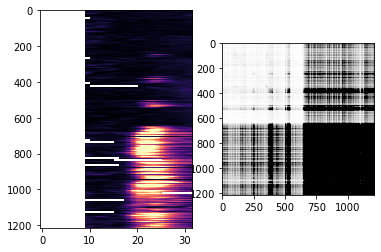

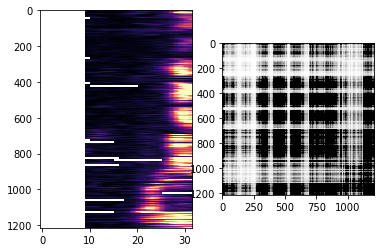

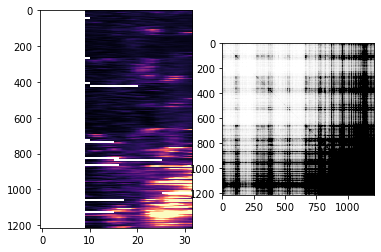

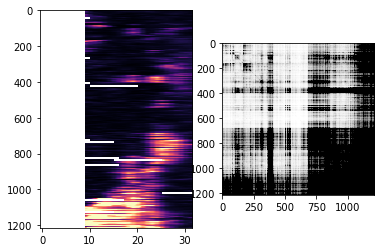

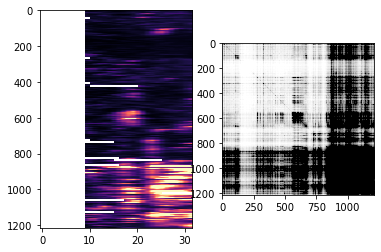

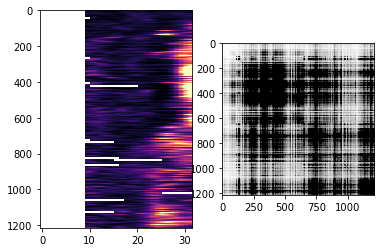

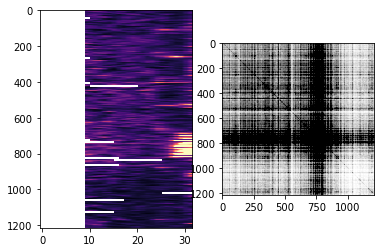

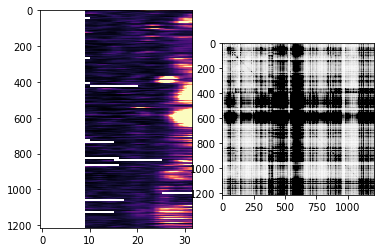

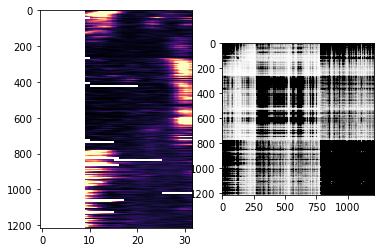

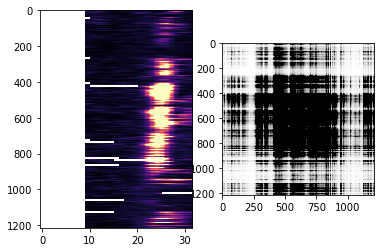

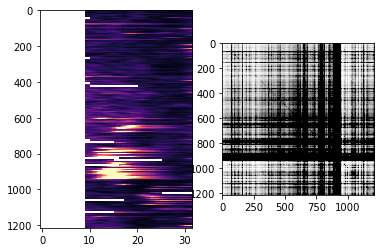

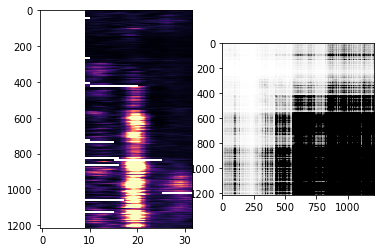

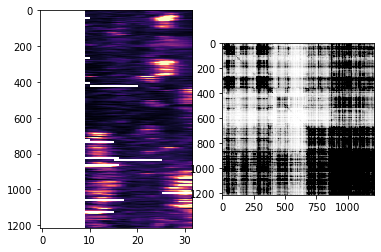

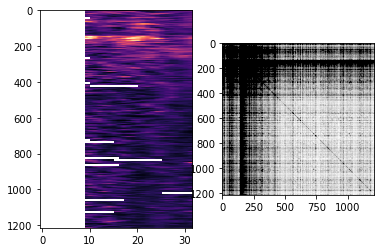

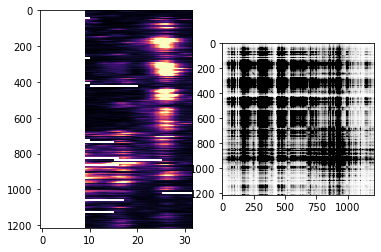

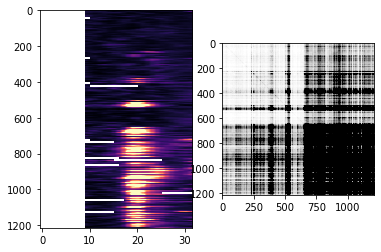

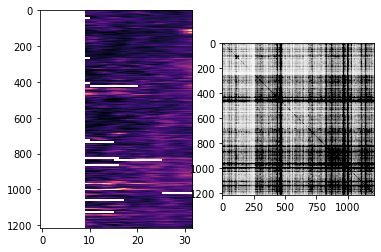

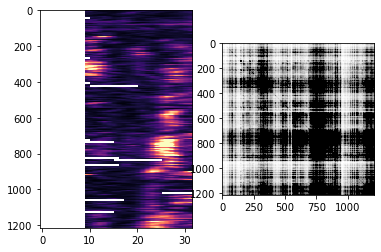

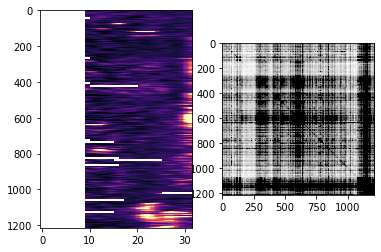

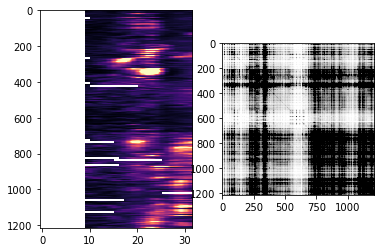

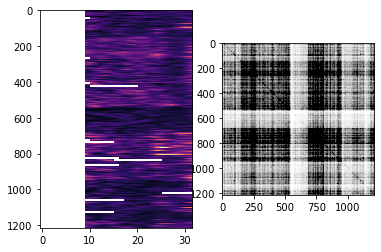

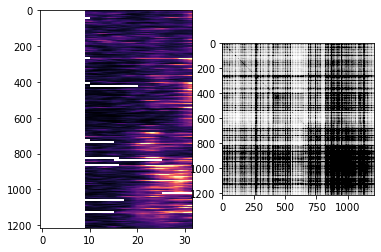

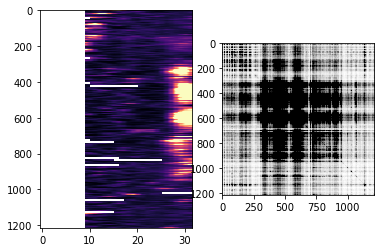

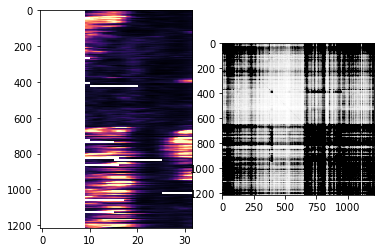

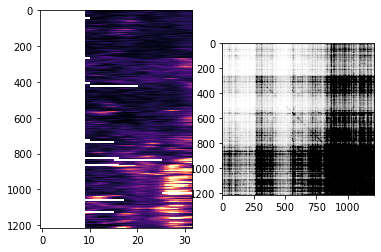

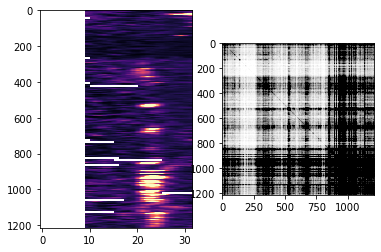

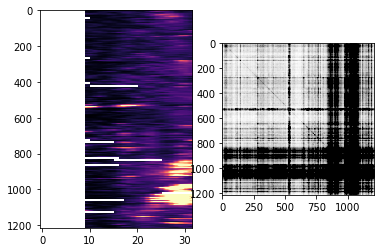

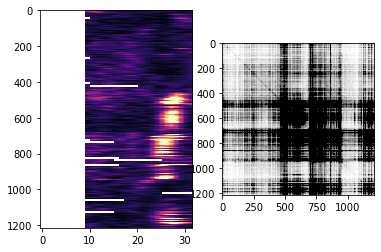

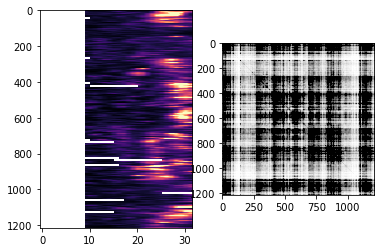

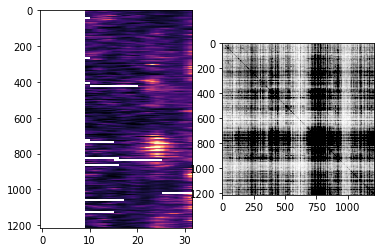

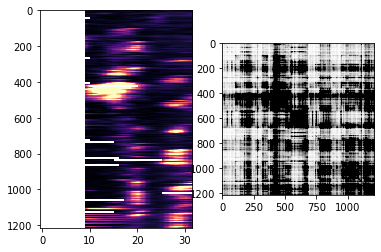

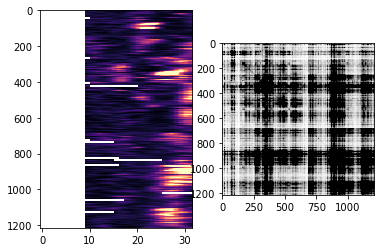

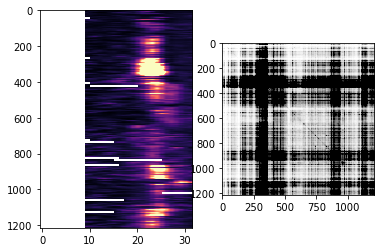

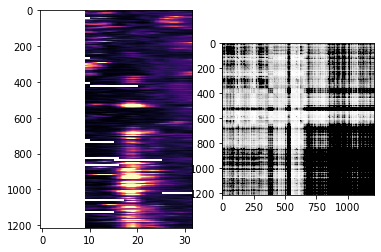

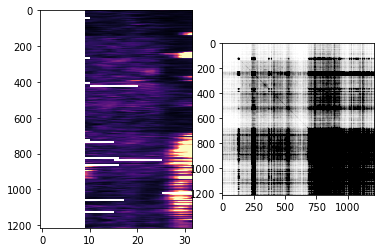

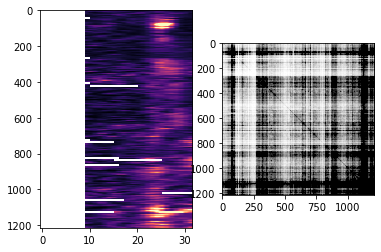

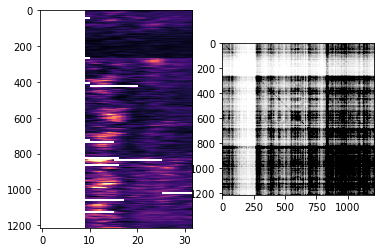

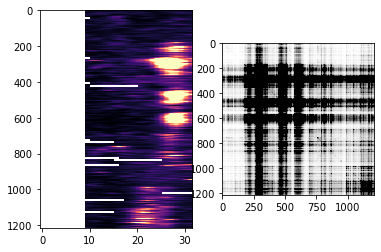

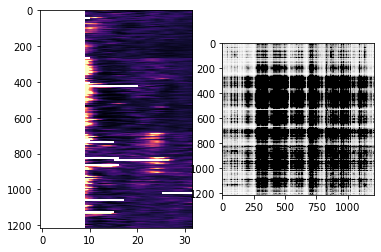

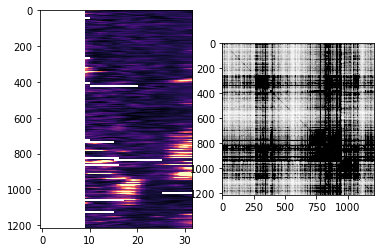

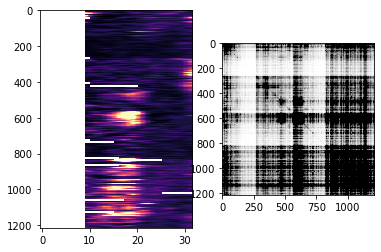

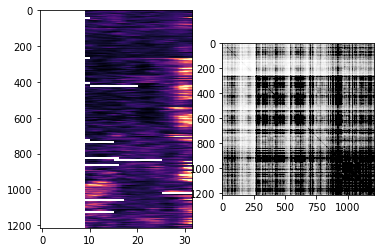

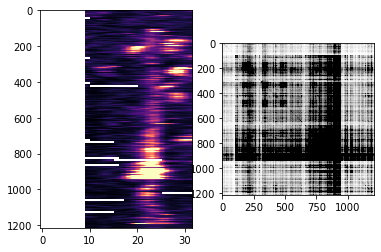

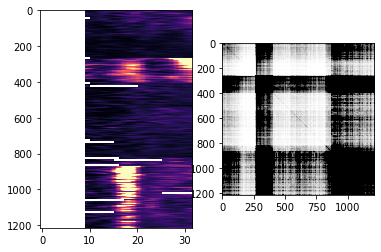

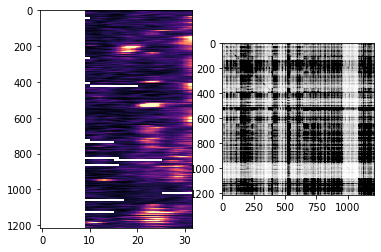

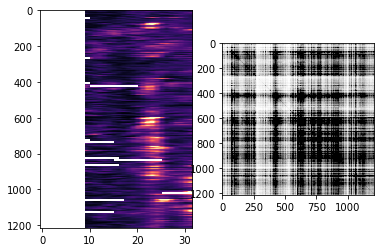

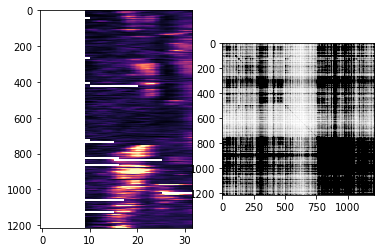

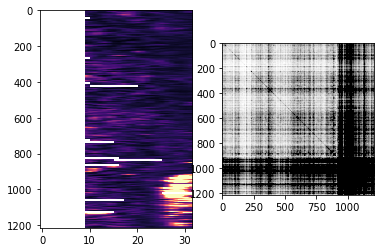

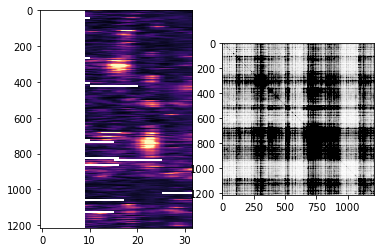

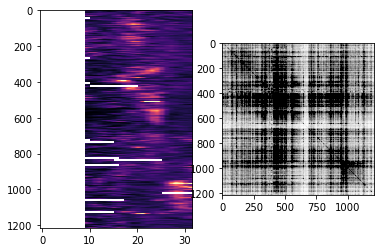

In [11]:
os.makedirs(os.path.join("/home/mplitt/Fig_scratch",mouse),exist_ok=True)
for i in range(50):
    f,ax = plt.subplots(1,2)
    tm = sp.ndimage.gaussian_filter1d(mega_sess.trial_matrices['spks'][:,:,i],1,axis=-1)
    ax[0].imshow(tm/np.nanmean(tm),cmap='magma',vmax=5,aspect='auto')
    
    tm = np.copy(mega_sess.trial_matrices['spks'][:,:,i])
    tm[np.isnan(tm)]=0.
    
    tm_normed = tm/np.linalg.norm(tm,axis=1,ord=2,keepdims=True)
    sm = np.matmul(tm,tm.T)
    ax[1].imshow(sm,vmin=np.percentile(sm,20),vmax=np.percentile(sm,80),cmap="Greys")
    f.savefig(os.path.join("/home/mplitt/Fig_scratch",mouse,"cell_%d.png" % i))
#     ax.set_xlim([8,42-6])

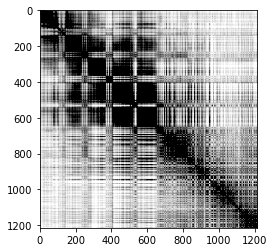

In [16]:
tm = mega_sess.trial_matrices['spks']
tm[np.isnan(tm)]=0

tm = sp.ndimage.filters.gaussian_filter1d(tm,1,axis=1)
tm = tm.reshape(mega_sess.trial_matrices['spks'].shape[0],-1)

tm_normed = tm/np.linalg.norm(tm,axis=1,ord=2,keepdims=True)
sm = np.matmul(tm_normed,tm_normed.T)
f,ax = plt.subplots()
ax.imshow(sm,cmap='Greys',vmin=np.percentile(sm,20),vmax=np.percentile(sm,80))